### Regresi Linear Variabel Jamak

**Import packages yang diperlukan**

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

**Membaca data**

In [17]:
# Membaca dataset dari file CSV
df = pd.read_csv("/content/Student_Performance.csv")

# Melihat lima baris pertama dataset
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,SampleQuestionPapersPracticed,Performance_Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


**Preprocessing data**

Mengecek data null

In [18]:
# Mengecek jumlah nilai null di setiap kolom
null_counts = df.isnull().sum()
print("Jumlah nilai null di setiap kolom:")
print(null_counts)

Jumlah nilai null di setiap kolom:
Hours_Studied                    0
Previous_Scores                  0
Extracurricular_Activities       0
Sleep_Hours                      0
SampleQuestionPapersPracticed    0
Performance_Index                0
dtype: int64


Mengecek data duplikat

In [19]:
# Mengecek data duplikat
df.duplicated().sum()

127

In [20]:
# Menghapus baris yang duplikat
df = df.drop_duplicates()

In [21]:
# Mengecek kembali data duplikat
df.duplicated().sum()

0

Mengubah tipe data jadi numerik

In [22]:
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,SampleQuestionPapersPracticed,Performance_Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


**Eksplorasi data - Eksplorasi deskriptif data yang diunduh.**

In [23]:
# Merangkum statistik deskriptif dari dataset
df.describe()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,SampleQuestionPapersPracticed,Performance_Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


**Visualisasi data**

Beberapa fitur dapat dieksplorasi dengan cara berikut.

In [24]:
# Memilih kolom-kolom yang akan divisualisasikan
cdf = df[['Hours_Studied','Previous_Scores','Extracurricular_Activities','Sleep_Hours','SampleQuestionPapersPracticed','Performance_Index']]
cdf.head(10)

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,SampleQuestionPapersPracticed,Performance_Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
5,3,78,0,9,6,61
6,7,73,1,5,6,63
7,8,45,1,4,6,42
8,5,77,0,8,2,61
9,4,89,0,4,0,69


Fitur-fitur tersebut dapat diplot sebagai berikut:

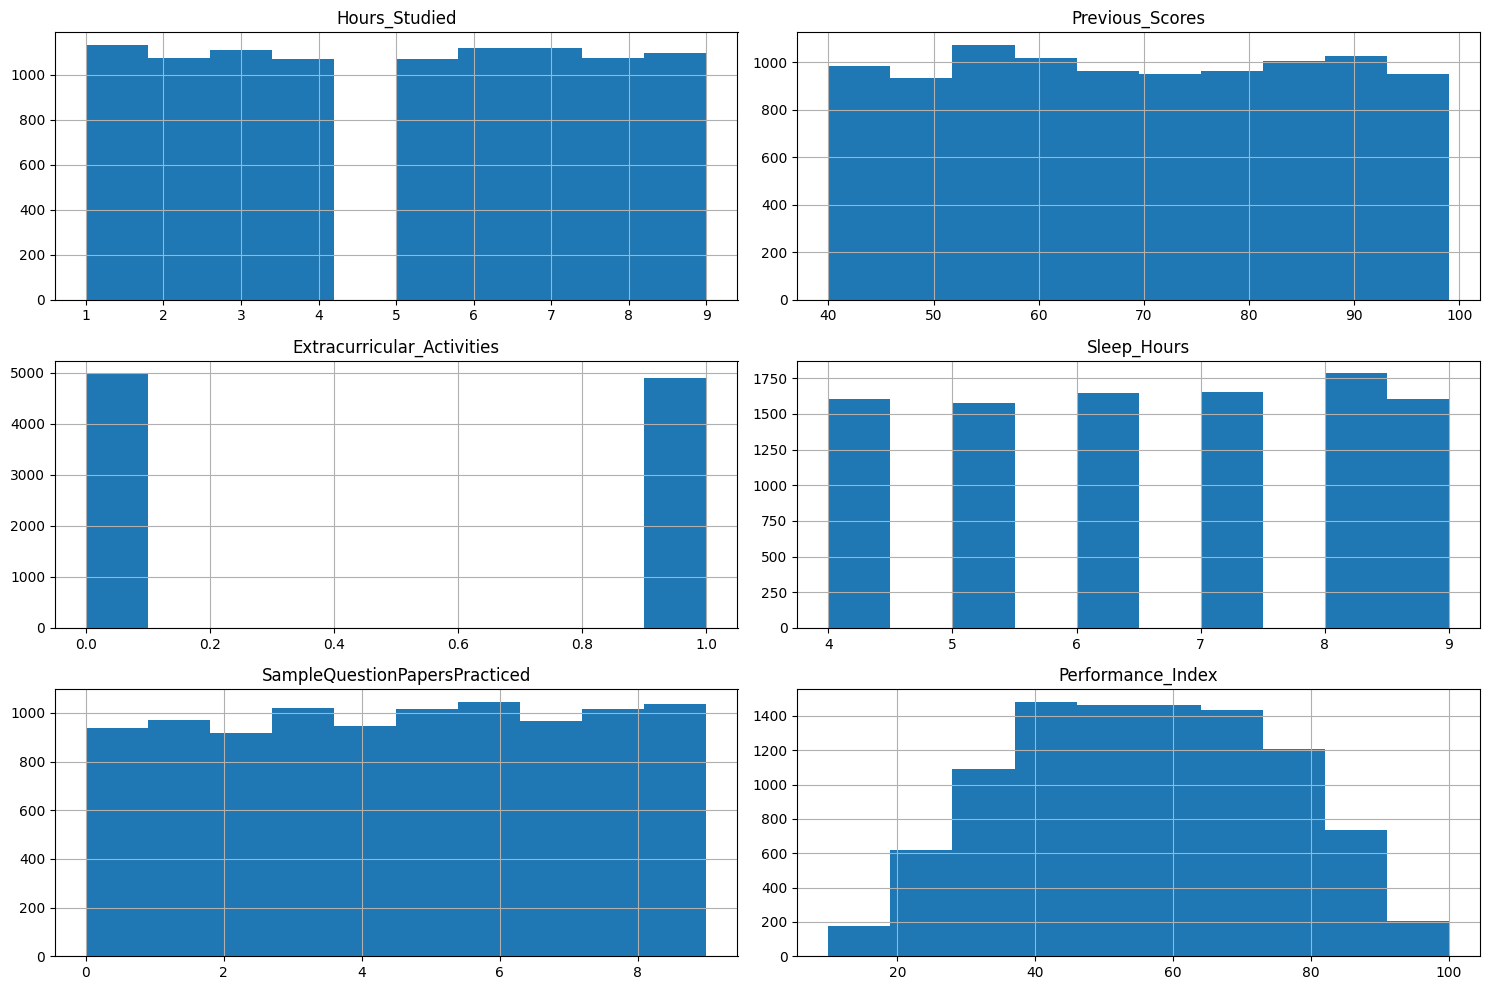

In [25]:
# Membuat histogram untuk setiap kolom
viz = cdf[['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities', 'Sleep_Hours', 'SampleQuestionPapersPracticed', 'Performance_Index']]
viz.hist(figsize=(15, 10))
plt.tight_layout()  # Menjaga tata letak agar rapi
plt.show()

**Pembagian Data dan Pembuatan Model Regresi Linear**

In [26]:
# Memisahkan data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cdf.drop(axis=0, columns='Performance_Index'),
                                                    cdf['Performance_Index'],
                                                    train_size=0.7,
                                                    test_size=0.3)

In [27]:
# Membuat model regresi linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Evaluasi model dengan mencetak skor R-squared pada data uji
print(model.score(X_test, y_test))

0.9888160246374147


In [29]:
# Menampilkan intercept dan koefisien dari model
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 -33.95412536473141
Coefficients: 
 [2.83937716 1.01885996 0.60741222 0.47647854 0.18149171]


In [30]:
# Membuat prediksi menggunakan data uji
pred = model.predict(X_test)
print(pred)

from sklearn import metrics

# Menghitung nilai RMSE (Root Mean Squared Error)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))
print('Nilai RMSE:\n',rmse)

[82.30248684 68.28070152 30.25865744 ... 33.81546463 56.82462578
 54.1948385 ]
Nilai RMSE:
 2.03562049081828


In [32]:
import pickle
pickle.dump(model,open('performa_model.sav','wb'))